<a href="https://colab.research.google.com/github/snowwLee/PMNAV/blob/main/%EA%B0%95%EB%82%A8_%EC%82%AC%EA%B3%A0_%EC%8B%9C%EA%B0%84%EB%8C%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KT에이블스쿨/빅프로젝트/강남_21-22_data.csv',encoding='CP949')

In [ ]:
data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,위도,경도
0,2021011700100198,2021년 1월 17일 18시,일요일,서울특별시 강남구 논현동,경상사고,0,0,1,0,차대사람 - 보도통행중,...,개인형이동수단(PM),남,34세,상해없음,보행자,여,48세,경상,37.501325,127.025499
1,2021012100100094,2021년 1월 21일 09시,목요일,서울특별시 강남구 역삼동,경상사고,0,0,1,0,차대사람 - 기타,...,개인형이동수단(PM),여,30세,상해없음,보행자,여,35세,경상,37.498837,127.029269
2,2021012400100234,2021년 1월 24일 18시,일요일,서울특별시 강남구 논현동,경상사고,0,0,1,0,차대차 - 기타,...,개인형이동수단(PM),남,31세,경상,승용,남,25세,상해없음,37.507348,127.026522
3,2021012400100324,2021년 1월 24일 21시,일요일,서울특별시 강남구 역삼동,경상사고,0,0,1,0,차대차 - 기타,...,개인형이동수단(PM),남,19세,상해없음,이륜,여,52세,경상,37.500989,127.051770
4,2021020200100378,2021년 2월 2일 19시,화요일,서울특별시 강남구 역삼동,경상사고,0,0,1,0,차대차 - 기타,...,개인형이동수단(PM),남,27세,상해없음,이륜,남,28세,경상,37.505565,127.037543


In [ ]:
# 사고 시간만 추출하기
data['사고시간대'] = data['사고일시'].str.extract(r'(\d+)시').astype(int)

In [ ]:
time_vc = data['사고시간대'].value_counts()
time_vc

18    17
22    14
19    12
9     11
17    10
21     9
23     9
2      8
14     8
0      8
8      7
10     7
20     6
15     6
12     5
1      5
3      5
13     5
16     4
11     3
7      2
5      2
6      1
4      1
Name: 사고시간대, dtype: int64

In [ ]:
time_vc_data = pd.Series(time_vc).sort_index()
time_vc_data

0      8
1      5
2      8
3      5
4      1
5      2
6      1
7      2
8      7
9     11
10     7
11     3
12     5
13     5
14     8
15     6
16     4
17    10
18    17
19    12
20     6
21     9
22    14
23     9
Name: 사고시간대, dtype: int64

In [ ]:
peak_hour = time_vc_data.idxmax()
peak_hour

18

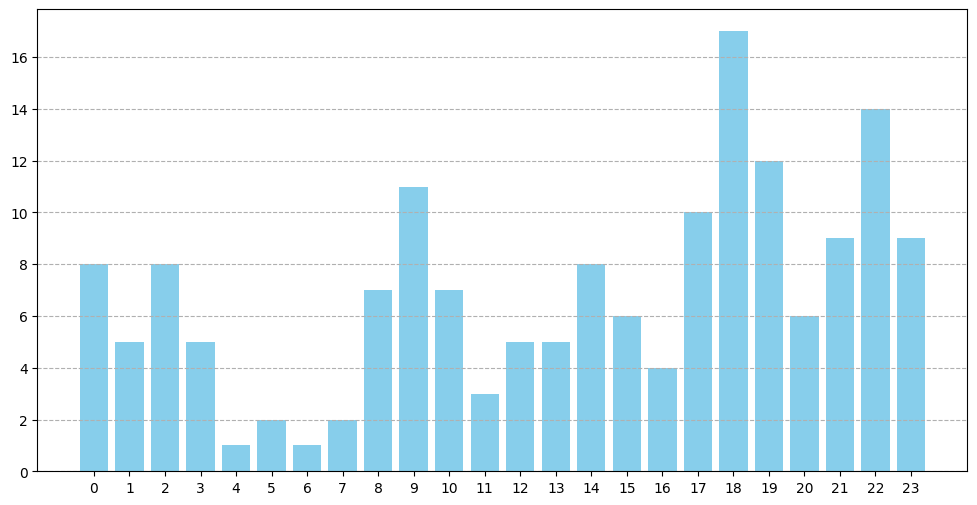

In [ ]:
#막대그래프 확인
plt.figure(figsize=(12,6))
plt.bar(time_vc_data.index, time_vc_data.values, color='skyblue')
plt.xticks(range(0, 24)) # X축을 0시부터 23시까지 표시
plt.grid(axis='y', linestyle='--')
plt.show()

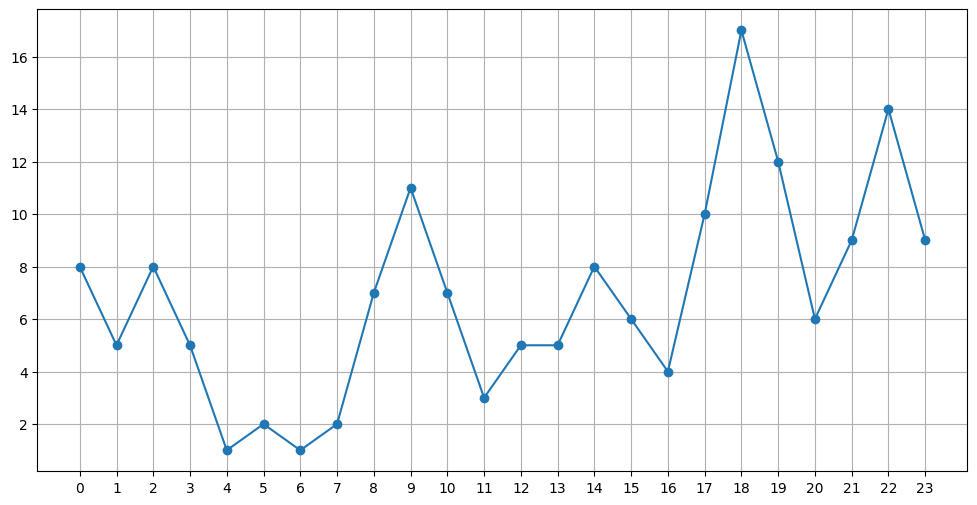

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(time_vc_data.index, time_vc_data.values, marker='o', linestyle='-')
plt.xticks(range(0, 24)) # X축을 0시부터 23시까지 표시
plt.grid(True)
plt.show()

## 3시간 씩 묶기

In [ ]:
#시간대를 그룹별로 묶어서 찾기(3시간)

data['시간대그룹3'] = data['사고시간대'] // 3

In [ ]:
time3_grouped_vc = data['시간대그룹3'].value_counts().sort_index()
time3_grouped_vc

0    21
1     8
2    10
3    21
4    18
5    20
6    35
7    32
Name: 시간대그룹, dtype: int64

In [ ]:
time3_grouped_vc_data = pd.Series(time3_grouped_vc).sort_index()
time3_grouped_vc_data

0    21
1     8
2    10
3    21
4    18
5    20
6    35
7    32
Name: 시간대그룹, dtype: int64

In [ ]:
peak_3hour_grouped = time3_grouped_vc_data.idxmax()
peak_3hour_grouped

6

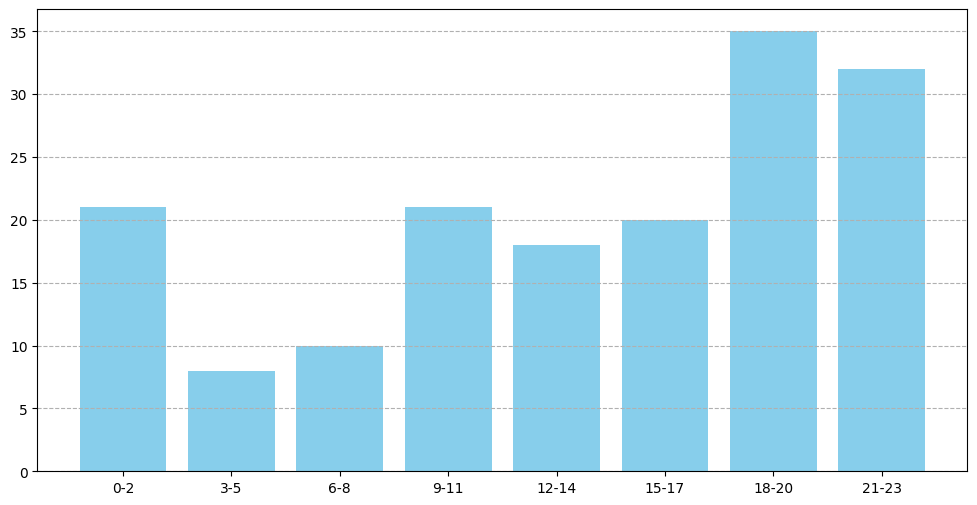

In [ ]:
#막대그래프 확인
plt.figure(figsize=(12,6))
plt.bar(time3_grouped_vc_data.index, time3_grouped_vc_data.values, color='skyblue')
xticks_labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']
plt.xticks(range(0, 8), xticks_labels) # X축을 0시부터 23시까지 표시
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
#카이제곱검정

# 각 시간대별 사고 발생 횟수
time_vc = time_vc.values

# 모든 시간대에서 사고가 균등하게 발생한다고 가정했을 때의 기대 빈도구하기

# total_hit = 관측된 모든 사고의 총 횟수
total_hit = sum(time_vc)

# expected =  각 시간대별로 기대되는 사고 횟수(모든 시간대에서 사고가 균등하게 발생한다고 가정)
expected = [total_hit / len(time_vc)] * len(time_vc)

# 카이제곱 검정 수행
chi2_stat, p_value = chisquare(time_vc, f_exp=expected)

print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value <= 0.01:
    print("귀무 가설 기각: 시간대별 사고 발생 빈도에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("귀무 가설 유지: 시간대별 사고 발생 빈도에 통계적으로 유의미한 차이가 없습니다.")

Chi2 Statistic: 54.49090909090909
P-value: 0.00022921520348965696
귀무 가설 기각: 시간대별 사고 발생 빈도에는 통계적으로 유의미한 차이가 있습니다.


In [ ]:
#카이제곱검정(3시간씩 묶었을 때)

time3_grouped_c = time3_grouped_vc.values

total_hit = sum(time3_grouped_c)
expected = [total_hit / len(time3_grouped_c)] * len(time3_grouped_c)

chi2_stat, p_value = chisquare(time3_grouped_c, f_exp=expected)

print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value <= 0.01:
    print("귀무 가설 기각: 시간대별 사고 발생 빈도에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print("귀무 가설 유지: 시간대별 사고 발생 빈도에 통계적으로 유의미한 차이가 없습니다.")

Chi2 Statistic: 29.86060606060606
P-value: 0.00010071568502306085
귀무 가설 기각: 시간대별 사고 발생 빈도에는 통계적으로 유의미한 차이가 있습니다.
